#### Sequentially Decision tree Models are going to get added in gradient Boosting

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
m=df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived','Cabin'])
Y=df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [9]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Sex', 'Embarked']

In [11]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe=Pipeline(steps=([('impute',SimpleImputer(strategy='median')),
                          ('scalar',StandardScaler())]))

In [14]:
cat_pipe=Pipeline(steps=([('impute',SimpleImputer(strategy='most_frequent')),
                          ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))]))

In [15]:
pre=ColumnTransformer([('num',num_pipe,con),
                       ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [16]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [18]:
X_pre=pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [20]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
793,-1.566107,-0.104637,-0.474545,-0.473674,-0.030371,0.0,1.0,1.0,0.0,0.0
23,-1.566107,-0.104637,-0.474545,-0.473674,0.066360,0.0,1.0,0.0,0.0,1.0
97,-1.566107,-0.488887,-0.474545,0.767630,0.627278,0.0,1.0,1.0,0.0,0.0
9,-0.369365,-1.180535,0.432793,-0.473674,-0.042956,1.0,0.0,1.0,0.0,0.0
157,0.827377,0.049062,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [21]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [22]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
617,0.827377,-0.258337,0.432793,-0.473674,-0.324253,1.0,0.0,0.0,0.0,1.0
379,0.827377,-0.796286,-0.474545,-0.473674,-0.491874,0.0,1.0,0.0,0.0,1.0
725,0.827377,-0.719436,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
826,0.827377,-0.104637,-0.474545,-0.473674,0.489104,0.0,1.0,0.0,0.0,1.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0


In [23]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


In [24]:
xtrain.shape

(712, 10)

In [25]:
xtest.shape

(179, 10)

### Create a Gradient Boosting classifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=1,learning_rate=0.4,max_depth=1,min_samples_split=3,min_samples_leaf=3)
model.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.4, max_depth=1, min_samples_leaf=3,
                           min_samples_split=3, n_estimators=1)

In [28]:
model.score(xtrain,ytrain)

0.7879213483146067

In [29]:
model.score(xtest,ytest)

0.7821229050279329

### Getting max accuracy of 78%
### For improving the score need to perform Hyperparameter tunning

In [30]:
params={'n_estimators':[100,150,175,200,300],
        'learning_rate':[0.01,0.12,0.16,0.2],
        'max_depth':[3,4,5,6,7,8,9],
        'min_samples_split':[3,4,5,6,7,8,9,10,11],
        'min_samples_leaf':[3,4,5,6,7,8,9,10]}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
gbc=GradientBoostingClassifier()
rscv=RandomizedSearchCV(gbc,param_distributions=params,cv=5,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.12, 0.16,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9, 10],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9, 10, 11],
                                        'n_estimators': [100, 150, 175, 200,
                                                         300]},
                   scoring='f1_macro')

In [32]:
rscv.score(xtrain,ytrain)

0.9299781930132125

In [33]:
rscv.score(xtest,ytest)

0.8339957604663487

In [34]:
rscv.best_params_

{'n_estimators': 175,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 3,
 'learning_rate': 0.12}

In [36]:
best_gbc=rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.12, min_samples_leaf=3,
                           min_samples_split=5, n_estimators=175)

In [37]:
best_gbc.score(xtrain,ytrain)

0.9353932584269663

In [38]:
best_gbc.score(xtest,ytest)

0.8435754189944135

### Perform prediction for train and test

In [39]:
ypred_tr=best_gbc.predict(xtrain)
ypred_ts=best_gbc.predict(xtest)

In [42]:
ypred_tr[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [49]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [45]:
ypred_ts[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [50]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


### Create a confusion matrix for testing

In [52]:
best_gbc.classes_

array([0, 1], dtype=int64)

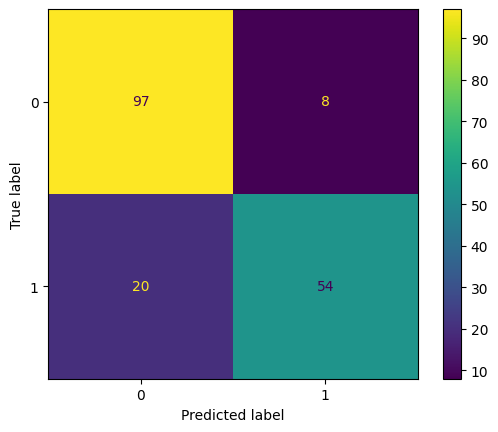

In [53]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cmd=ConfusionMatrixDisplay(cf,display_labels=best_gbc.classes_)
cmd.plot()

### Print classification Report

In [54]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       105
           1       0.87      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.85      0.84      0.84       179



##### Because model of accuracy and  f1 score are around 80% this is good model using a above model for prediction of out of sample data

### Predicting out of sample data

In [55]:
xnew=pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [58]:
m=xnew.isna().sum()
m[m>0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [59]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

### Apply pre transfrom on new

In [62]:
xnew_pred=pre.transform(xnew)
xnew_pred.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


### Predict the new result for xnew

In [63]:
preds = best_gbc.predict(xnew_pred)
preds[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [64]:
best_gbc.classes_

array([0, 1], dtype=int64)

In [66]:
probs = best_gbc.predict_proba(xnew_pred)[:,1]
probs[0:5]

array([0.11032405, 0.1046294 , 0.58553381, 0.12943047, 0.32435584])

### Save above results in csv

In [67]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [68]:
df_final['Survived_pred'] = preds
df_final['Prob'] = probs

In [69]:
df_final

,PassengerId,Survived_pred,Prob
0,892,0,0.110324
1,893,0,0.104629
2,894,1,0.585534
3,895,0,0.129430
4,896,0,0.324356
...,...,...,...
413,1305,0,0.069651
414,1306,1,0.978460
415,1307,0,0.019236
416,1308,0,0.069651


In [70]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    273
1    145
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

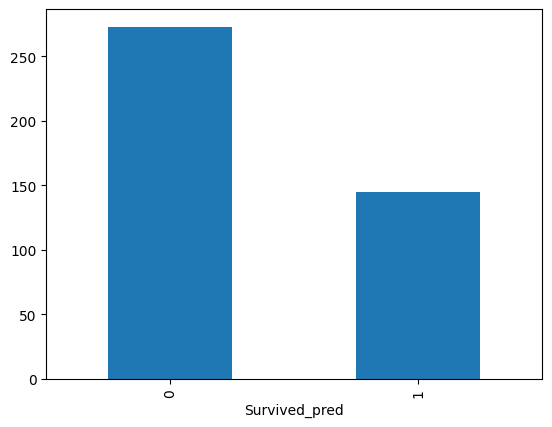

In [71]:
df_final['Survived_pred'].value_counts().plot(kind='bar')

### Plot the feature importances for the data

In [72]:
imp = best_gbc.feature_importances_
imp

array([0.11773692, 0.15676297, 0.04636972, 0.01290934, 0.21171245,
       0.22441287, 0.19490271, 0.00593171, 0.00581995, 0.02344136])

In [73]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [74]:
imp = pd.Series(imp)
imp.index = xtrain.columns

In [75]:
imp

num__Pclass        0.117737
num__Age           0.156763
num__SibSp         0.046370
num__Parch         0.012909
num__Fare          0.211712
cat__Sex_female    0.224413
cat__Sex_male      0.194903
cat__Embarked_C    0.005932
cat__Embarked_Q    0.005820
cat__Embarked_S    0.023441
dtype: float64

In [76]:
imp = imp.sort_values(ascending=False)
imp

cat__Sex_female    0.224413
num__Fare          0.211712
cat__Sex_male      0.194903
num__Age           0.156763
num__Pclass        0.117737
num__SibSp         0.046370
cat__Embarked_S    0.023441
num__Parch         0.012909
cat__Embarked_C    0.005932
cat__Embarked_Q    0.005820
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

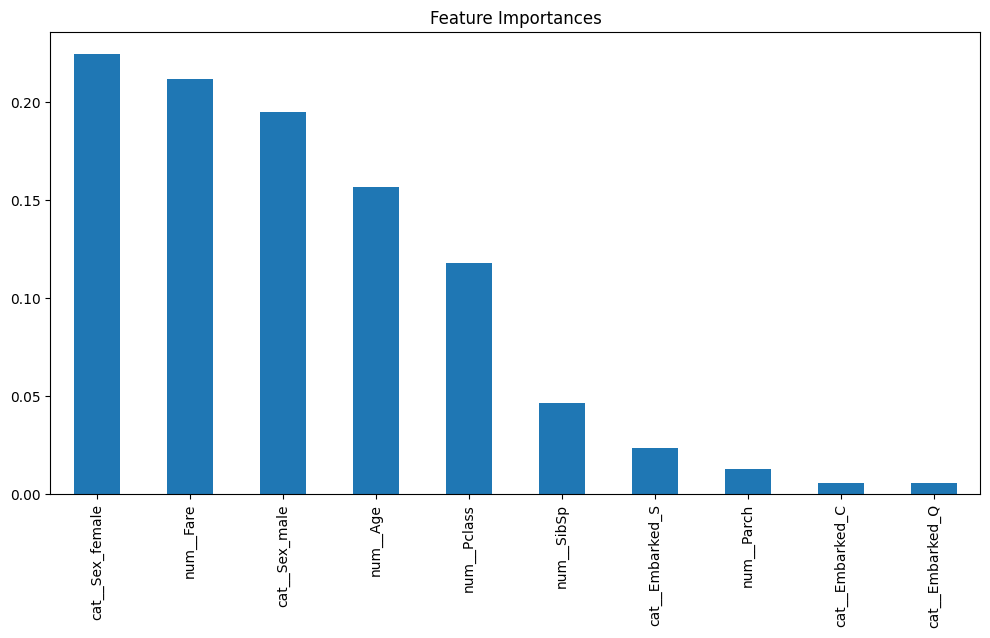

In [77]:
imp.plot(kind='bar', title='Feature Importances', figsize=(12, 6))